<a href="https://colab.research.google.com/github/naterattner/data71200/blob/master/project_3/data71200_summer24_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python notebook for project 3: https://bbhosted.cuny.edu/ultra/courses/_2383576_1/cl/outline

The goal for this assignment is two apply different types of unsupervised learning techniques on the dataset created in Project 1.

I'll be using this dataset containing estimations of obesity levels based on eating habits and physical condition: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

!pip install -U scikit-learn==1.4
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.8 MB/s eta 0:00:00


## Step 1: Load data, including testing/training split from Project 1

We will perform four steps in this section:
- Load the dataset from UCI
- Performing one-hot encoding on categorical features
- Split the data into a testing and training set
- Scale the data using StandardScaler

#### Load data from UCI

In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
features = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
targets = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

### Perform one-hot encoding
Because the dataset contains categorical variables, we will first perform one-hot encoding. This is done on a Dataframe containing all data to ensure categorical values are represented in the same way in both the testing and training sets.

Once one-hot encoding is done, we split the data into testing and training sets.

In [3]:
# Encode the categorical features
data_dummies = pd.get_dummies(features, dtype=int)

# Encode the target variable using LabelEncoder
# This encodes labels that were in the target data with values
# from 0 through n_classes-1, so 0 through 6 in this case

from sklearn.preprocessing import LabelEncoder

# 'NObeyesdad' is the target column
label_encoder = LabelEncoder()
targets_encoded = label_encoder.fit_transform(targets['NObeyesdad'])

#### Split into testing and training sets

In [4]:
X = data_dummies
y = targets_encoded
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (2111, 31) y.shape: (2111,)


In [5]:
# From project 1 we know the data is fairly evenly distributed,
# but we can still use stratified sampling on the target to avoid sampling bias

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42,test_size=0.2)

In [6]:
# Check that the strafied sampling worked -- the distribution of targets should be the same in each dataset

def getArrayValueCounts(array):
  unique, counts = np.unique(array, return_counts=True)
  total_count = counts.sum()
  shares = counts / total_count

  print("Unique values:", unique)
  print("Counts:", counts)
  print("Shares:", shares)

print('Test')
getArrayValueCounts(y_test)
print("")
print('Train')
getArrayValueCounts(y_train)

Test
Unique values: [0 1 2 3 4 5 6]
Counts: [54 58 70 60 65 58 58]
Shares: [0.12765957 0.13711584 0.16548463 0.14184397 0.1536643  0.13711584
 0.13711584]

Train
Unique values: [0 1 2 3 4 5 6]
Counts: [218 229 281 237 259 232 232]
Shares: [0.12914692 0.13566351 0.16646919 0.14040284 0.15343602 0.13744076
 0.13744076]


#### Scale the data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 2: PCA for feature selection

Two tasks in this section:
- Show how many features do you need to retain to capture 95% of the variance
- Evaluate whether this improves your best-performing model from Project 2


#### Features to explain 95% of variance

We will do this on the unscaled and then the scaled data

In [31]:
from sklearn.decomposition import PCA

# keep components to explain 95% of the variance
pca_unscaled = PCA(n_components=0.95)

# fit PCA model to data
pca_unscaled.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(str(len(pca_unscaled.explained_variance_ratio_)) + ' features')
print(pca_unscaled.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
2 features
[0.93988132 0.05429352]


Text(0, 0.5, 'Principal components')

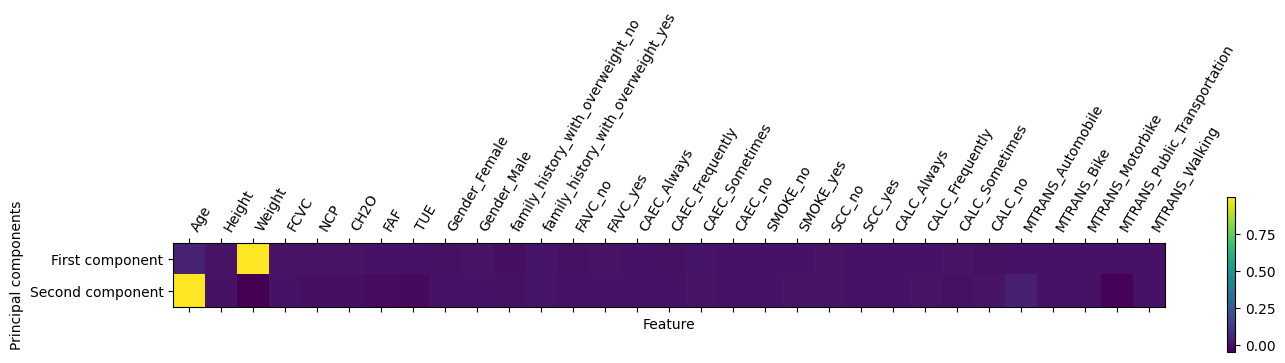

In [34]:
# plot the principal components
plt.matshow(pca_unscaled.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(data_dummies.columns)),
           data_dummies.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

With unscaled data, we need two features to retain 95% of the variance



In [30]:
# keep components to explain 95% of the variance using the scaled data this time
pca_scaled = PCA(n_components=0.95)

# fit PCA model to data
pca_scaled.fit(X_train_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(str(len(pca_scaled.explained_variance_ratio_)) + ' features')
print(pca_scaled.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
20features
[0.13637523 0.08868986 0.07871772 0.06957283 0.06369763 0.06034785
 0.05121554 0.04711266 0.04243443 0.03982594 0.03677446 0.03587652
 0.03265677 0.03159093 0.03042904 0.02932461 0.02568618 0.02290776
 0.02236284 0.02043113]


Text(0, 0.5, 'Principal components')

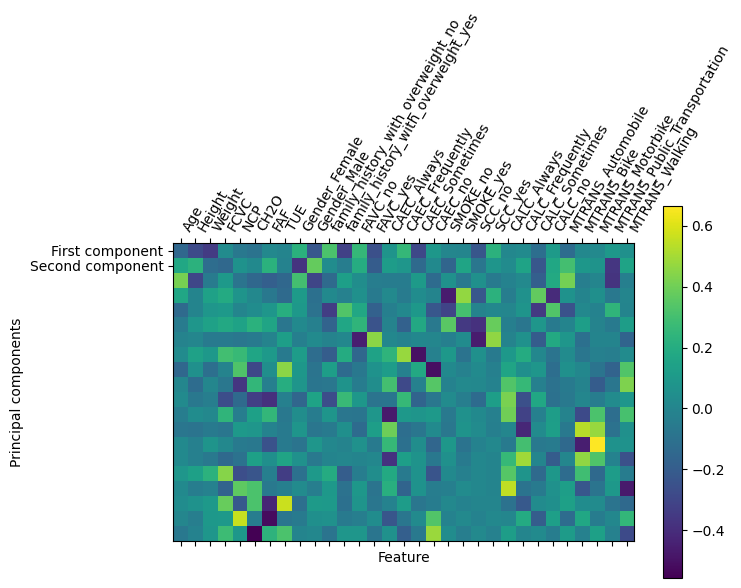

In [33]:
# plot the principal components
plt.matshow(pca_scaled.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(data_dummies.columns)),
           data_dummies.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

With scaled data, we need 20 features to retain 95% of the variance

#### Evaluate whether this improves best-performing model from project 2

The best-performing model from project 2 was a random forest with parameters of {'max_depth': None, 'n_estimators': 200}. This returned an accuracy of 93.6% on the test set, as seen below.

In [36]:
# Set up random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=2)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.936


Now we set up an instance of PCA with two principal components of the unscaled data, and run the random forest on it.



In [40]:
pca_2_unscaled = PCA(n_components=2)

# fit on and transforming the training set and then transform the test set
X_train_pca_unscaled = pca_2_unscaled.fit_transform(X_train)
X_test_pca_unscaled = pca_2_unscaled.transform(X_test)

In [42]:
forest.fit(X_train_pca_unscaled, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train_pca_unscaled, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_pca_unscaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.804


This accuracy of 80.4% on the test set is worse than the random forest performed on the original data.

Next we set up an instance of PCA with 20 principal components of the scaled data, and run the random forest on it.




In [43]:
pca_20_scaled = PCA(n_components=20)

# fit on and transforming the training set and then transform the test set
X_train_pca_scaled = pca_20_scaled.fit_transform(X_train_scaled)
X_test_pca_scaled = pca_20_scaled.transform(X_test_scaled)

In [44]:
forest.fit(X_train_pca_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train_pca_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_pca_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.825


This accuracy of 82.5% on the test set is worse than the random forest performed on the original data.

### Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.

#### k-Means (use an elbow visualization to determine the optimal numbers of clusters)

#### Run on original data


##### Clustering

Text(0, 0.5, 'Feature 1')

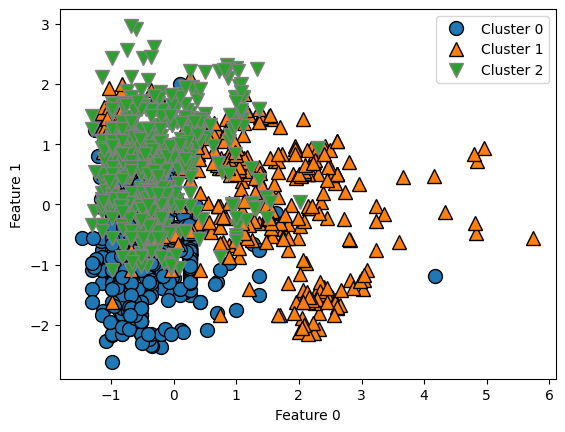

In [48]:
# import library
from sklearn.cluster import KMeans

# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

# get assignments (labels)
assignments=kmeans.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Elbow visualization

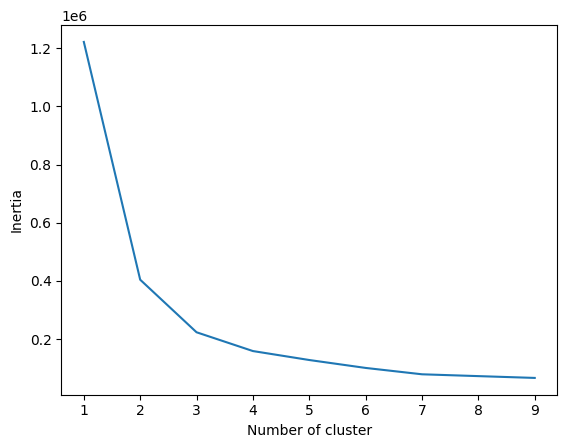

In [67]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Here we look for the value of k at the “elbow,” or the point after which the inertia starts decreasing in a linear fashion. For this data the optimal number of clusters is 3.

#### Run on PCA data

##### Clustering



Text(0, 0.5, 'Feature 1')

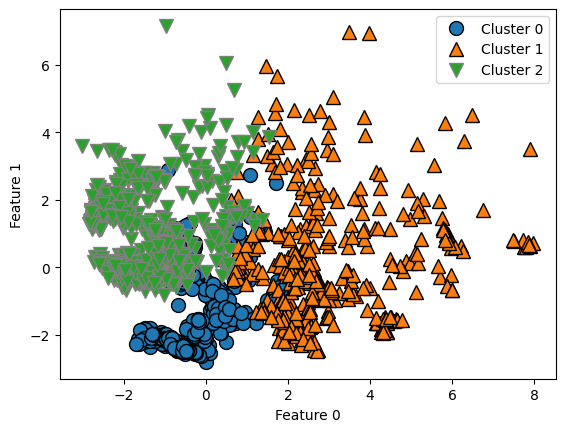

In [72]:
# instantiate an instance of k-Means
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_train_pca_scaled)

# get assignments (labels)
assignments_pca=kmeans_pca.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], assignments_pca)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Elbow visualization

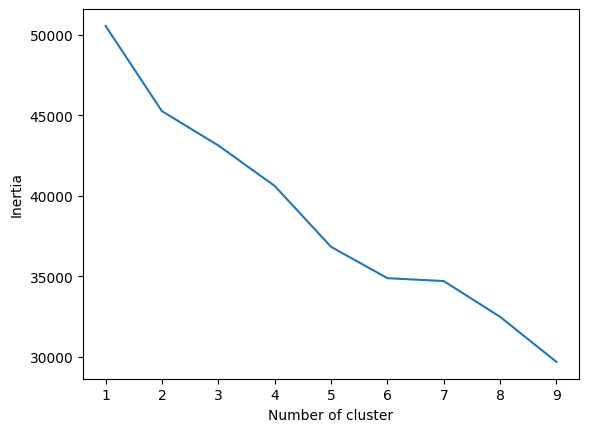

In [73]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansK = KMeans(n_clusters=k, max_iter=1000).fit(X_train_pca_scaled)
    inertiaVals[k] = kmeansK.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

 For this data the optimal number of clusters is 6.

##### ARI and Silhouette Coefficient

> Add blockquote



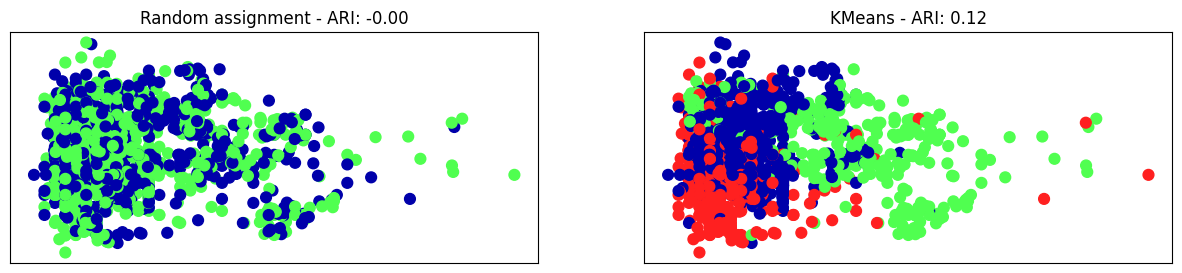

In [54]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 2, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_scaled)
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))